# A/B Testing for Data Science using Python – A Must-Read Guide for Data Scientists

Based in the Shipra Saxena's work.

Our objective here is to check which newsletter brings higher traffic on the website i.e the conversion rate. We will use A/B testing and collect data to analyze which newsletter performs better.

<img src="images/ABtestsimple.png"/>

Here, we have a dummy data having an experiment result of an A/B testing for 30 days. Now we will run a two-sample t-test on the data using Python to ensure the statistical significance of data.

### General Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 
import matplotlib.pyplot as plt

%matplotlib inline

### Get the Data

In [2]:
df = pd.read_csv('data/ABdata.csv')

df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


### EDA

In [4]:
df.describe()

,Day,Conversion_A,Conversion_B
count,30.000000,30.000000,30.000000
mean,15.500000,0.162000,0.193333
std,8.803408,0.036141,0.027334
min,1.000000,0.100000,0.150000
25%,8.250000,0.132500,0.180000
50%,15.500000,0.165000,0.190000
75%,22.750000,0.187500,0.200000
max,30.000000,0.230000,0.270000


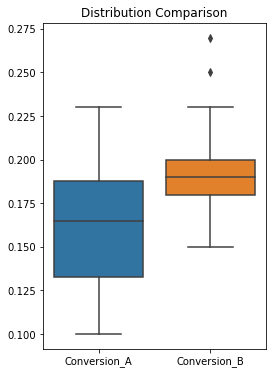

In [5]:
plt.figure(figsize=(4,6)) 

plt.title('Distribution Comparison')

sns.boxplot(data=df.loc[:,['Conversion_A','Conversion_B']])

plt.show()

<AxesSubplot:title={'center':'Distribution'}, xlabel='Conversion A & B', ylabel='Count'>

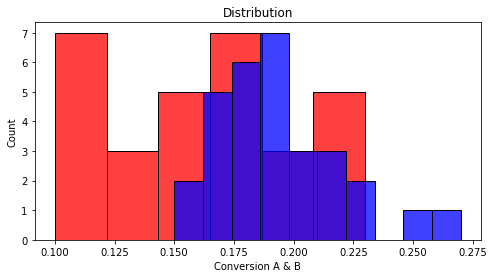

In [6]:
plt.figure(figsize=(8,4))

plt.title('Distribution')
plt.xlabel('Conversion A & B')

sns.histplot(df['Conversion_A'],color='r')
sns.histplot(df['Conversion_B'],color='b')

### T-test

In [7]:
t_stat, p_val= ss.ttest_ind(df['Conversion_B'],df['Conversion_A'])

print(f'T-statistic: {t_stat}')
print()
print(f'P-value: {p_val}')

T-statistic: 3.78736793091929

P-value: 0.000363796012828762


### Conclusion

For our example, the observed value i.e the mean of the test group (B) is 0.19. The hypothesized value (Mean of the control group, A) is 0.16. On the calculation of the t-score, we get the t-score as .3787. and the p-value is 0.00036.

SO what does all this mean for our A/B Testing?

Here, our p-value is less than the significance level i.e 0.05 (p-value = 0.00036 < alpha = 0.05). Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A. So our recommendation would be to replace our current newsletter with B to bring more traffic on our website.